The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.

We can conduct a paired t-test using the scipy function stats.ttest_rel(). Let's generate some dummy patient weight data and do a paired t-test:

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [4]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439859)

If p-val = 0.011 < 0.05 ,so the null hypothesis is rejected.

##Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

Let's investigate these errors with a plot:

Text(0, 0.02, 'Type 2 Error')

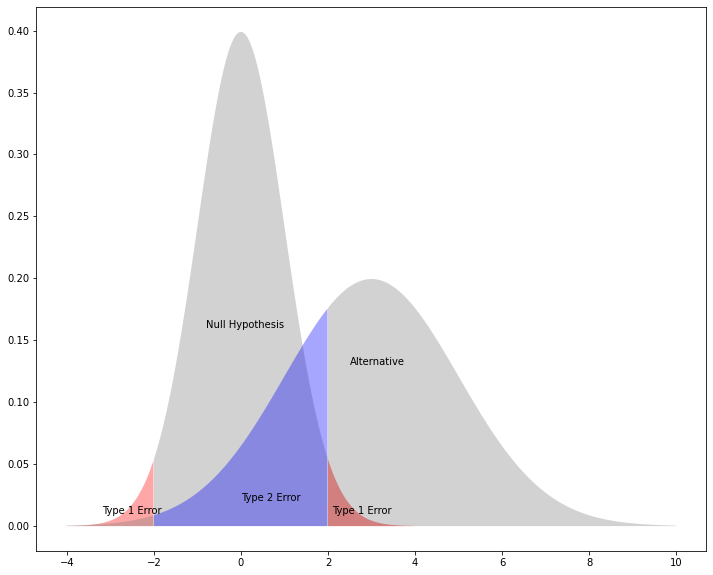

In [3]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.16, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13,  s= "Alternative")
plt.text(x=2.1, y=0.01,  s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02,    s= "Type 2 Error")                # visit rpsychologist.com